# Bank Deposit Prediction System Using Machine Learning
In the modern banking sector, predicting whether a customer will make a term deposit is crucial for optimizing marketing campaigns and improving financial services. Banks conduct marketing campaigns to attract potential customers, but inefficient targeting leads to wasted resources and lower conversion rates.

This project aims to develop a Machine Learning-based Bank Deposit Prediction System that analyzes customer data, past interactions, and marketing efforts to determine the likelihood of a customer making a term deposit. By leveraging predictive modeling, banks can optimize their strategies, focus on high-potential leads, and enhance customer engagement.

Key Features for Loan Approval Prediction:
1. **age** – Older individuals may have more financial stability.
2. **job** – Employment type can indicate income stability.
3. **marital** – Marital status may influence financial commitments.
4. **education** – Higher education levels often correlate with better jobs and income.
5. **default** – Whether the person has defaulted on past credit.
6. **balance** – The bank balance, indicating financial health.
7. **housing** – Whether they have a housing loan (may indicate existing debt).
8. **loan** – Whether they have any other personal loans.
9. **campaign, previous, poutcome** – Interaction history with the bank (not very relevant for loans but could help).


### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [5]:
df=pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


### `Collecting Insights from data

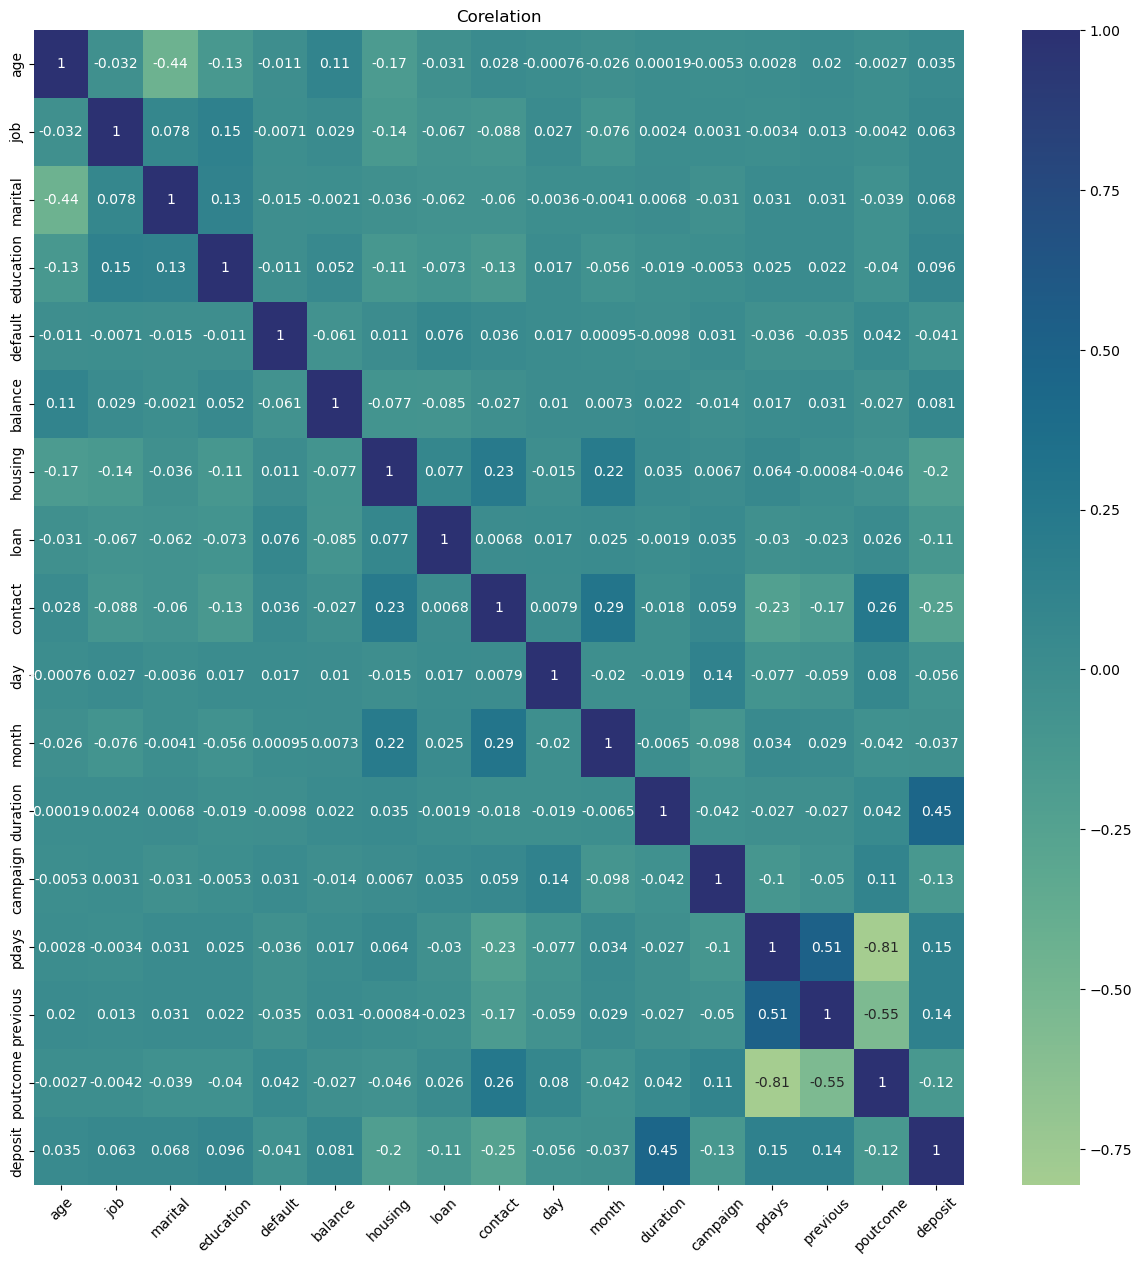

In [8]:
#Understanding Correlat
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest')
plt.title("Corelation")
plt.xticks(rotation=45)
plt.show()

##### From above heatmap we can observe that there is some correlation between Features

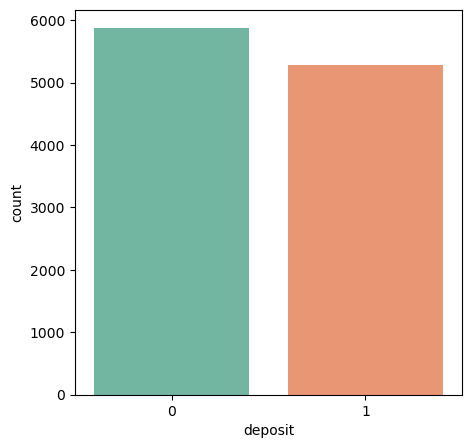

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='deposit',palette='Set2')
plt.show()

##### From this we can observe that data is almost balanced(Both chances of depositing money i.e No(0) & Yes(1) has almost equal number or records )

### Seperating Features and TargetA

In [13]:
#seperate features and target
x=df.iloc[:,:-1]
y=df["deposit"]


In [14]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [15]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

## Exploratory Data Analysis(EDA)

### 1. Data Cleaning and Preprocessing (Handling Missing value if any)

In [18]:
#Checking Data Type
x.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [19]:
x.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [20]:
#Removing Duplicate rows
x.drop_duplicates(inplace=True)

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
dtypes: int64(16)
memory usage: 1.4 MB


#### The dataset have been checked and it has been observed there are no missing values to be handled. 

### 2. Finding Outliers(remove if any)

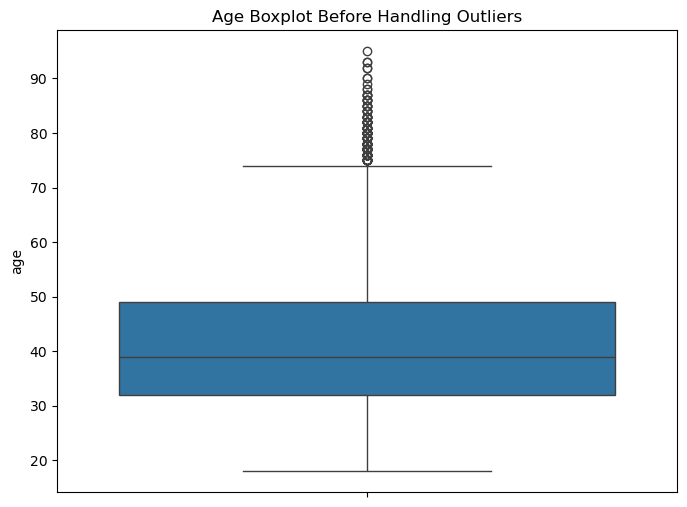

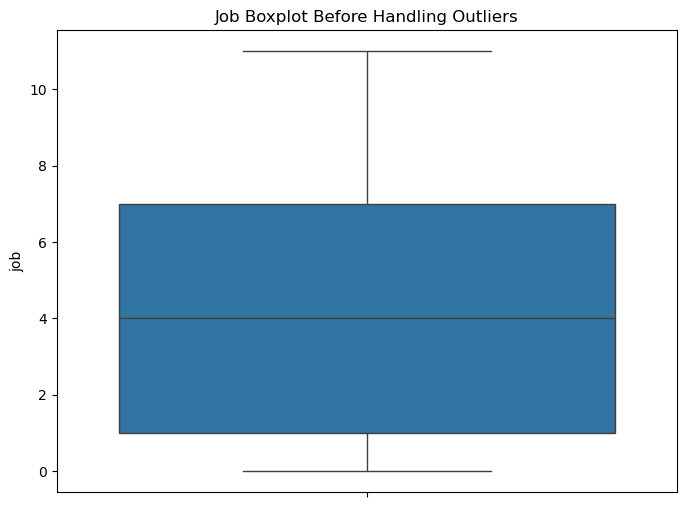

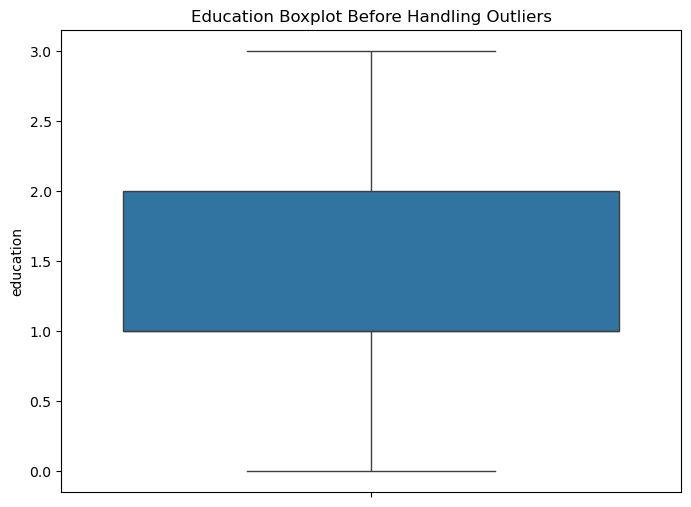

In [24]:
# Boxplot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x['age'])
plt.title('Age Boxplot Before Handling Outliers')
plt.show()

# Boxplot for job
plt.figure(figsize=(8, 6))
sns.boxplot(x['job'])
plt.title('Job Boxplot Before Handling Outliers')
plt.show()

# Boxplot for education
plt.figure(figsize=(8, 6))
sns.boxplot(x['education'])
plt.title('Education Boxplot Before Handling Outliers')
plt.show()



In [25]:
#Removal of Outlier
i=x[x['age'] > 70].index
x.drop(i,axis=0,inplace=True)
y.drop(i,axis=0,inplace=True)

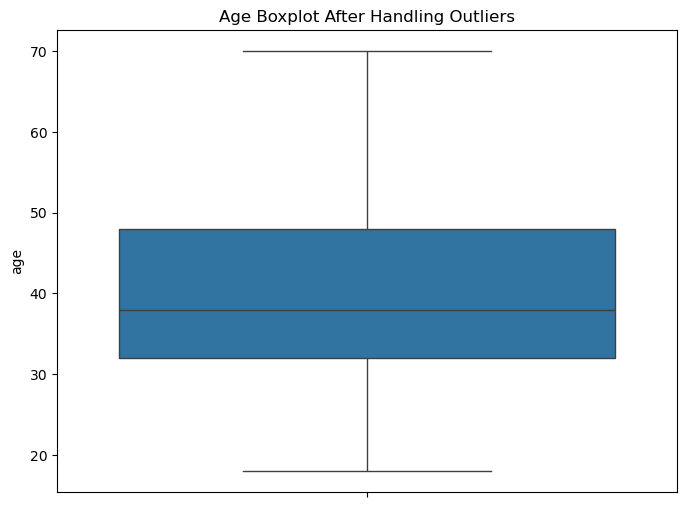

In [26]:
# Boxplot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x['age'])
plt.title('Age Boxplot After Handling Outliers')
plt.show()

#### Conclusion :
The outliers in the data has been checked and we can observe that there are outliers present in the **'age'** and have been handled.This cleaning process ensures more accurate model performance by eliminating extreme values that could skew results. The dataset is now ready for further analysis and modeling.

### 3. Checking Skewness and Remove if any

In [29]:
x.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000
mean,40.336211,4.474607,1.209937,1.294242,0.015337,1486.745982,0.484066,0.133988,0.490862,15.658279,5.443291,371.883552,2.521076,50.985306,0.819451,2.482322
std,10.586320,3.261295,0.625658,0.738446,0.122893,3013.723476,0.499769,0.340656,0.825150,8.433904,3.172589,348.705142,2.741117,109.052531,2.281225,1.002332
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,116.000000,0.000000,0.000000,0.000000,8.000000,3.000000,137.000000,1.000000,-1.000000,0.000000,2.000000
50%,38.000000,4.000000,1.000000,1.000000,0.000000,534.000000,0.000000,0.000000,0.000000,15.000000,6.000000,254.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1655.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,1.000000,1.000000,3.000000
max,70.000000,11.000000,2.000000,3.000000,1.000000,66653.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000


In [30]:
#Numerical Columns :
col=x.select_dtypes(['int64','float64']).columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

age
0.493204740668779


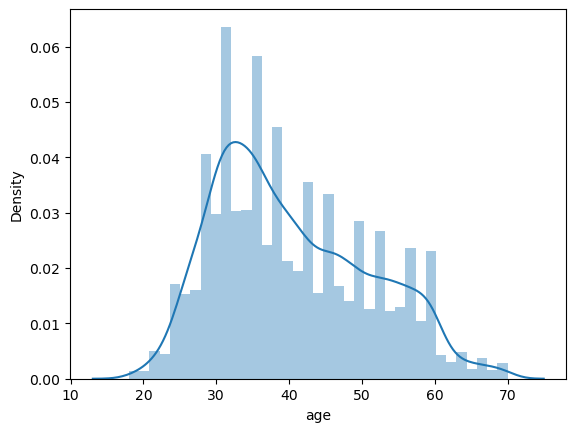

job
0.19244902191669114


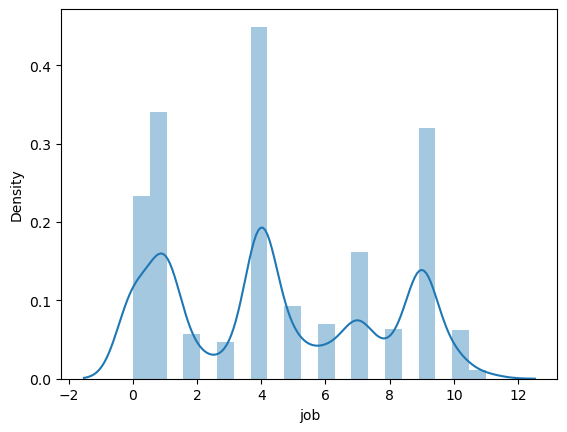

marital
-0.18715837997440654


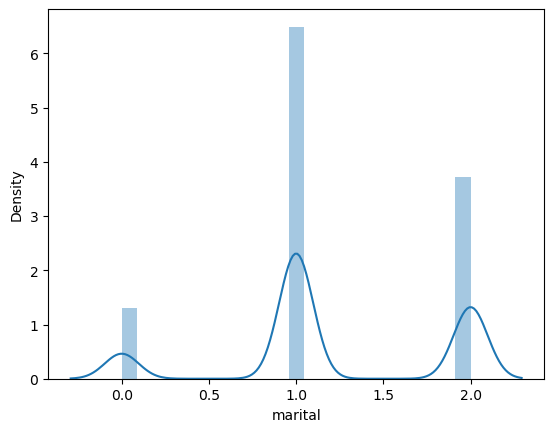

education
0.10849141470982811


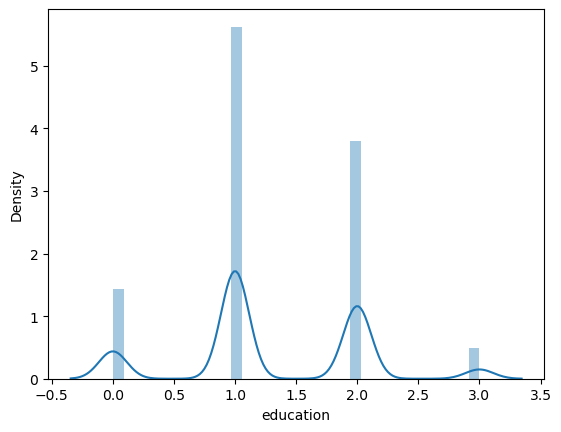

default
7.887912795328827


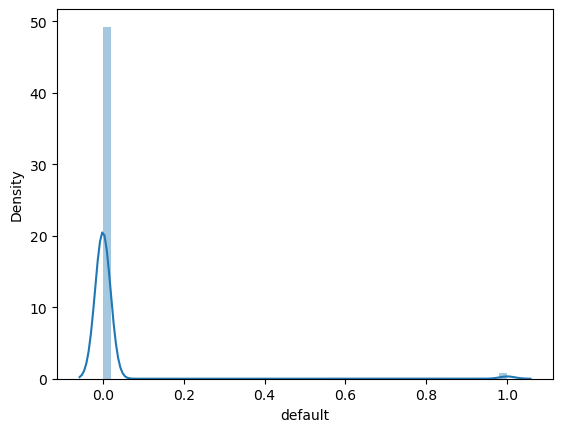

balance
6.653244397086676


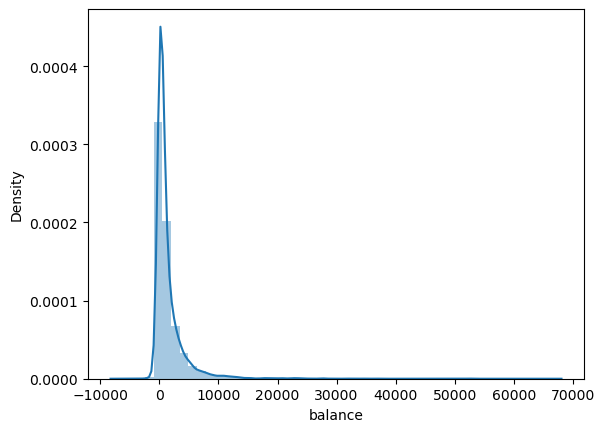

housing
0.0637664293844038


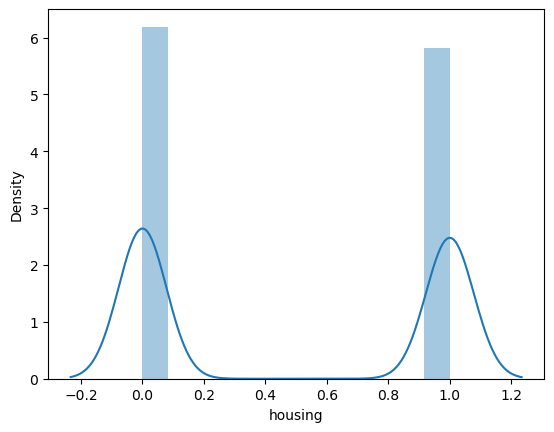

loan
2.1489648742210496


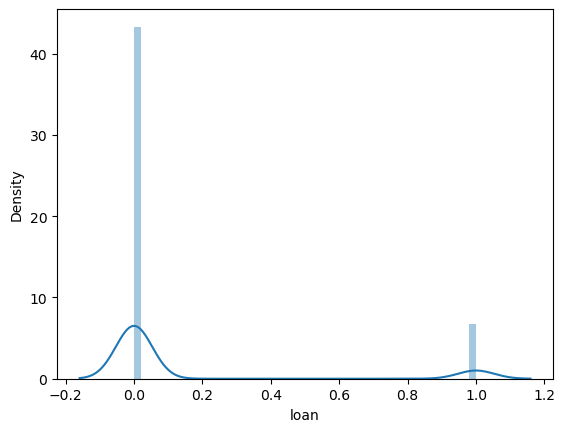

contact
1.1797526096419784


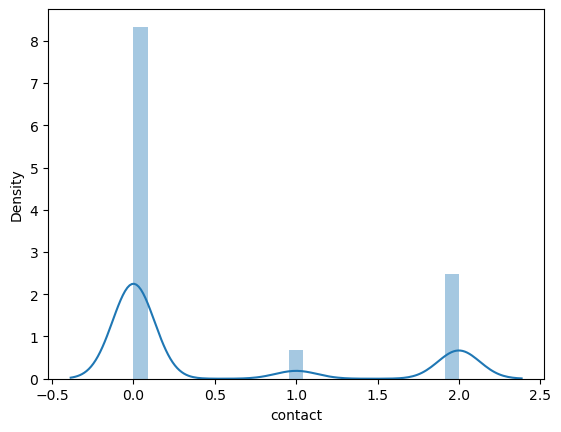

day
0.11193309212928787


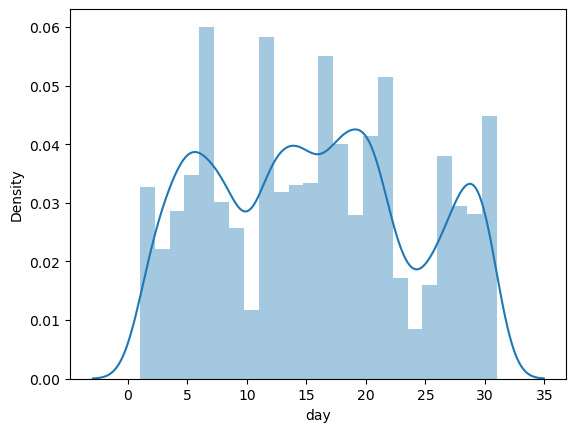

month
-0.33894041231130606


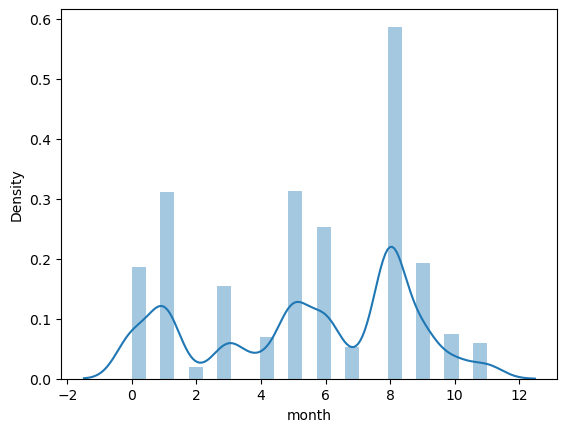

duration
2.1423835469923396


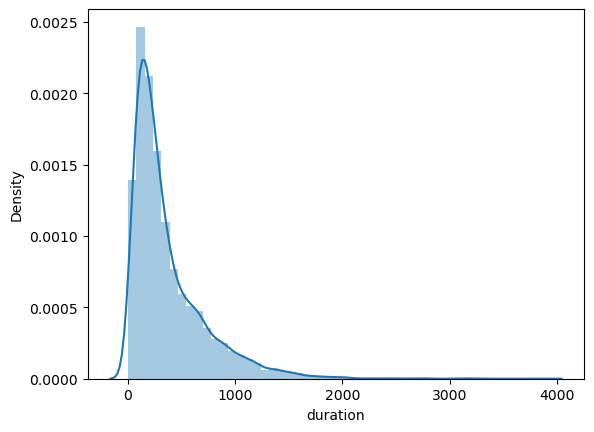

campaign
5.5330482813329285


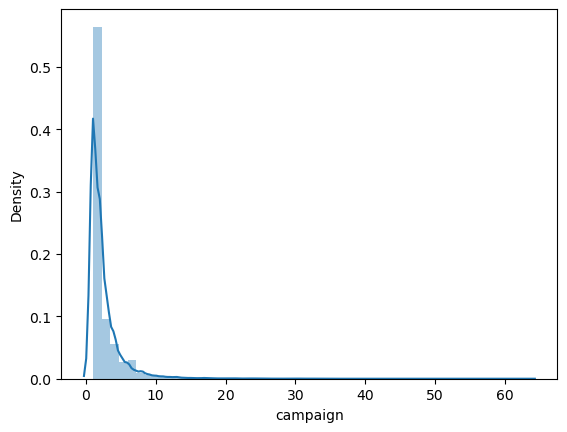

pdays
2.4675807420717244


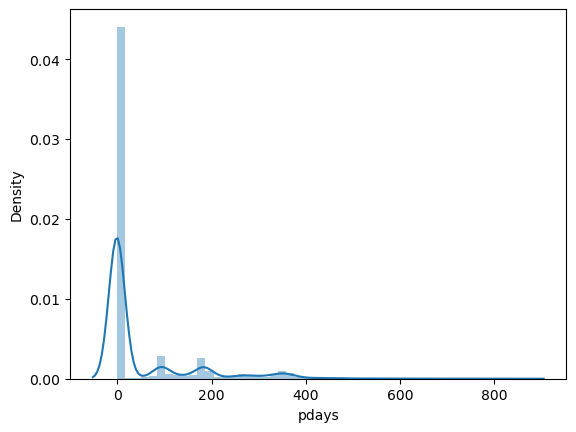

previous
7.488056881589501


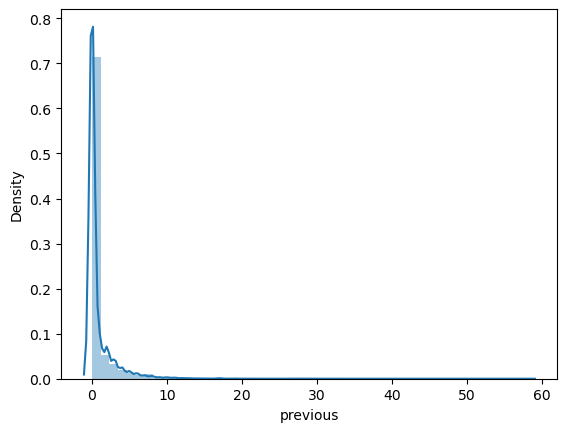

poutcome
-1.730588346467851


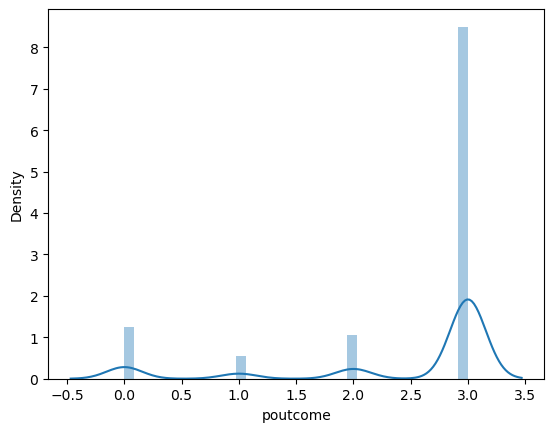

In [31]:
# To know amount of skewness :
from scipy.stats import skew   #scipy :scientific python library

for i in x[col]:
    print(i)
    print(skew(x[i]))
    
    plt.figure()
    sns.distplot(x[i])
    plt.show()

In [32]:
#Before Handling Skewness
skew(x['campaign'])

5.5330482813329285

In [33]:
x['campaign']=np.log(x['campaign'])   #np.log is used to reduced the skewness

In [34]:
#After Handling Skewness
skew(x['campaign'])

0.9396278365356564

#### Conclusion
The skewness is Observed in **campaingn** column and have beend handled with the help of **np.log**

### 4. Encoding(Handling Categorical Data)

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10889 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10889 non-null  int64  
 1   job        10889 non-null  int64  
 2   marital    10889 non-null  int64  
 3   education  10889 non-null  int64  
 4   default    10889 non-null  int64  
 5   balance    10889 non-null  int64  
 6   housing    10889 non-null  int64  
 7   loan       10889 non-null  int64  
 8   contact    10889 non-null  int64  
 9   day        10889 non-null  int64  
 10  month      10889 non-null  int64  
 11  duration   10889 non-null  int64  
 12  campaign   10889 non-null  float64
 13  pdays      10889 non-null  int64  
 14  previous   10889 non-null  int64  
 15  poutcome   10889 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 1.4 MB


#### Conclusion
Features does not conatin any Categorical column so we can proceed for further analysis.

### 5. Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.iloc[:,:]=sc.fit_transform(x.iloc[:,:])

In [41]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.763091,-1.372097,-0.335561,-0.398479,-0.124802,0.284131,1.032391,-0.393343,1.829009,-1.263800,0.805911,1.921816,-0.938128,-0.476722,-0.359232,0.516498
1,1.479693,-1.372097,-0.335561,-0.398479,-0.124802,-0.478416,-0.968625,-0.393343,1.829009,-1.263800,0.805911,3.140667,-0.938128,-0.476722,-0.359232,0.516498
2,0.062705,1.387670,-0.335561,-0.398479,-0.124802,-0.071923,1.032391,-0.393343,1.829009,-1.263800,0.805911,2.916972,-0.938128,-0.476722,-0.359232,0.516498
3,1.385228,0.774388,-0.335561,-0.398479,-0.124802,0.328265,1.032391,-0.393343,1.829009,-1.263800,0.805911,0.593986,-0.938128,-0.476722,-0.359232,0.516498
4,1.290762,-1.372097,-0.335561,0.955778,-0.124802,-0.432291,-0.968625,-0.393343,1.829009,-1.263800,0.805911,0.863567,0.079335,-0.476722,-0.359232,0.516498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.693022,-1.065456,1.262830,-1.752737,-0.124802,-0.493016,1.032391,-0.393343,-0.594904,0.514817,-1.715804,-0.329473,-0.938128,-0.476722,-0.359232,0.516498
11158,-0.126226,0.774388,-0.335561,-0.398479,-0.124802,-0.250116,-0.968625,-0.393343,1.829009,0.040519,0.175483,-0.828485,1.096798,-0.476722,-0.359232,0.516498
11159,-0.787487,1.387670,1.262830,-0.398479,-0.124802,-0.483725,-0.968625,-0.393343,-0.594904,0.396243,-1.400590,-0.619129,0.079335,-0.476722,-0.359232,0.516498
11160,0.251637,1.387670,-0.335561,-0.398479,-0.124802,-0.493348,-0.968625,2.542308,-0.594904,-0.908077,0.805911,-1.040708,0.079335,1.109743,1.832673,-2.476659


### 6. Feature Engineering


All the present features are necessary for the analysis, so there is no need to remove or add any column

### 7. Splitting the data into Traing and Testing

In [45]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

# Check the shape of training and test sets
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8711, 16), (2178, 16), (8711,), (2178,))

# Classification Algorithms 

#### Building model with the help of function


In [48]:
def mymodel(m):
    m.fit(xtrain,ytrain)
    ypred=m.predict(xtest)
    print(classification_report(ytest,ypred))
    return m

### 1. KNN(K-Nearest Neighbor)

In [50]:
#Importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

#Creating object
knn=KNeighborsClassifier()

#Calling the function
mymodel(knn)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1161
           1       0.79      0.70      0.74      1017

    accuracy                           0.78      2178
   macro avg       0.78      0.77      0.77      2178
weighted avg       0.78      0.78      0.77      2178



KNeighborsClassifier()

In [51]:
#This class helps to identify best parameters of respective algorithm which affect accuracy score.
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid={"n_neighbors":[3,5,7,9,11],
            "metric":["euclidean","minkowsi","manhattan"]}   

In [53]:
gd=GridSearchCV(knn,param_grid)
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)

In [54]:
gd.best_params_

{'metric': 'manhattan', 'n_neighbors': 9}

In [55]:
accuracy_score(ytest,ypred)

0.7855831037649219

In [56]:
#hypertunnig of k
acc_list=[]
for k in range(1,31):
    kn1=KNeighborsClassifier(n_neighbors=k)
    kn1.fit(xtrain,ytrain)
    ypred=kn1.predict(xtest)

    ac=accuracy_score(ytest,ypred)
    acc_list.append(ac)

In [57]:
print(acc_list)

[0.7378328741965106, 0.7162534435261708, 0.7736455463728191, 0.7557392102846648, 0.7754820936639119, 0.761248852157943, 0.7759412304866851, 0.7617079889807162, 0.7791551882460973, 0.7681359044995408, 0.7786960514233241, 0.7718089990817264, 0.7791551882460973, 0.7741046831955923, 0.7819100091827365, 0.7713498622589532, 0.7855831037649219, 0.7741046831955923, 0.7865013774104683, 0.7786960514233241, 0.7814508723599632, 0.7722681359044995, 0.7823691460055097, 0.7741046831955923, 0.7768595041322314, 0.7699724517906336, 0.7750229568411386, 0.7699724517906336, 0.7754820936639119, 0.7681359044995408]


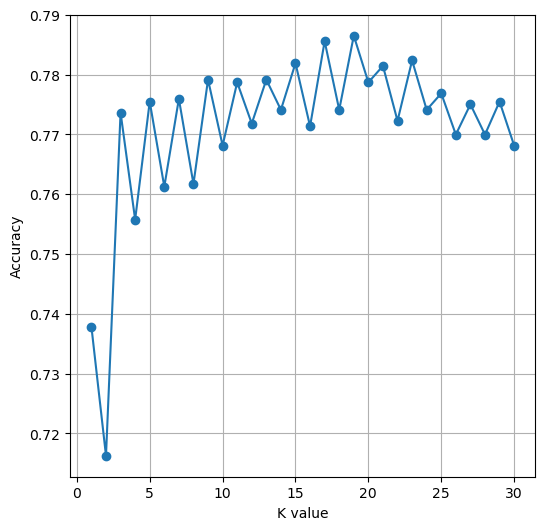

In [58]:
plt.figure(figsize=(6,6))
plt.plot(range(1,31),acc_list,marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [59]:
#Re-evaluating model
mymodel(KNeighborsClassifier(n_neighbors=19))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1161
           1       0.82      0.70      0.75      1017

    accuracy                           0.79      2178
   macro avg       0.79      0.78      0.78      2178
weighted avg       0.79      0.79      0.78      2178



KNeighborsClassifier(n_neighbors=19)

##### Conclusion:
The **K-Nearest Neighbors (KNN)** algorithm was used to classify the dataset, achieving an initial accuracy of **78%** . 
To enhance the model's performance, hyperparameter tuning was conducted using **GridSearchCV**. 
By selecting the optimal parameters (gs.best_params_), the accuracy improved to **79%** . 
This demonstrates the importance of fine-tuning hyperparameters to achieve better classification results.

### 2. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [63]:
mymodel(lr)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1161
           1       0.79      0.76      0.77      1017

    accuracy                           0.79      2178
   macro avg       0.79      0.79      0.79      2178
weighted avg       0.79      0.79      0.79      2178



LogisticRegression()

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[1006,  155],
       [ 350,  667]], dtype=int64)

#### Hypertunning With Solver

In [66]:
mymodel(LogisticRegression(solver='liblinear'))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1161
           1       0.79      0.76      0.77      1017

    accuracy                           0.79      2178
   macro avg       0.79      0.79      0.79      2178
weighted avg       0.79      0.79      0.79      2178



LogisticRegression(solver='liblinear')

In [67]:
mymodel(LogisticRegression(solver='newton-cg'))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1161
           1       0.79      0.76      0.77      1017

    accuracy                           0.79      2178
   macro avg       0.79      0.79      0.79      2178
weighted avg       0.79      0.79      0.79      2178



LogisticRegression(solver='newton-cg')

In [68]:
mymodel(LogisticRegression(solver='sag'))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1161
           1       0.79      0.76      0.77      1017

    accuracy                           0.79      2178
   macro avg       0.79      0.79      0.79      2178
weighted avg       0.79      0.79      0.79      2178



LogisticRegression(solver='sag')

In [69]:
mymodel(LogisticRegression(solver='saga'))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1161
           1       0.79      0.76      0.77      1017

    accuracy                           0.79      2178
   macro avg       0.79      0.79      0.79      2178
weighted avg       0.79      0.79      0.79      2178



LogisticRegression(solver='saga')

##### Conclusion :
The **logistic regression** model achieved a consistent accuracy of **79%** across different solvers **(default, liblinear,newton-cg,
sag, and saga)**, indicating stable performance and robustness. 
    This suggests that the data is relatively simple, and the solver choice has minimal impact on accuracy.

### 3. SVM(Support Vector Machine)

In [72]:
from sklearn.svm import SVC
classifier=SVC()

In [73]:
mymodel(classifier)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1161
           1       0.81      0.82      0.81      1017

    accuracy                           0.82      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.82      0.82      0.82      2178



SVC()

#### Hypertunning with Kernel

In [75]:
mymodel(SVC(kernel='linear'))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1161
           1       0.79      0.78      0.78      1017

    accuracy                           0.80      2178
   macro avg       0.80      0.80      0.80      2178
weighted avg       0.80      0.80      0.80      2178



SVC(kernel='linear')

In [76]:
mymodel(SVC(kernel='sigmoid'))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1161
           1       0.64      0.64      0.64      1017

    accuracy                           0.67      2178
   macro avg       0.66      0.66      0.66      2178
weighted avg       0.67      0.67      0.67      2178



SVC(kernel='sigmoid')

In [77]:
mymodel(SVC(kernel='poly'))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1161
           1       0.80      0.79      0.80      1017

    accuracy                           0.81      2178
   macro avg       0.81      0.81      0.81      2178
weighted avg       0.81      0.81      0.81      2178



SVC(kernel='poly')

#### Hypertunning With C and Gamma

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[1,10],"gamma":[1,10],"kernel":["rbf"]}

In [80]:
gd=GridSearchCV(classifier,param_grid,verbose=3)
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.742 total time=   3.4s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.738 total time=   3.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.769 total time=   3.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.756 total time=   3.9s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.769 total time=   7.6s
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.541 total time=   6.3s
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.544 total time=   3.2s
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.538 total time=   2.9s
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.544 total time=   3.1s
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.537 total time=   3.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.740 total time=   2.8s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

In [81]:
gd.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [82]:
sv1=gd.best_estimator_
sv1.fit(xtrain,ytrain)
ypred=sv1.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1161
           1       0.71      0.83      0.76      1017

    accuracy                           0.76      2178
   macro avg       0.77      0.76      0.76      2178
weighted avg       0.77      0.76      0.76      2178



##### Conclusion
With the help of **Support Vector Machine(SVM)** we have achieved accuraacy of **82%** with default parameters as **(C=1.0,kernel='rbf',gamma=3)**

### 4. Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [86]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1161
           1       0.77      0.76      0.76      1017

    accuracy                           0.78      2178
   macro avg       0.78      0.78      0.78      2178
weighted avg       0.78      0.78      0.78      2178



DecisionTreeClassifier()

In [87]:
#To check accuracy during training
dt.score(xtrain,ytrain)          #overfitting problem

1.0

In [88]:
dt.score(xtest,ytest)

0.7819100091827365

#### Hypertunning in DT(Prunig Technique)

##### Max-depth Pruning

In [91]:
for i in range(1,31):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"Max_depth={i} Accuracy={ac}")

Max_depth=1 Accuracy=0.7130394857667585
Max_depth=2 Accuracy=0.7442607897153352
Max_depth=3 Accuracy=0.7731864095500459
Max_depth=4 Accuracy=0.7754820936639119
Max_depth=5 Accuracy=0.7865013774104683
Max_depth=6 Accuracy=0.8094582185491277
Max_depth=7 Accuracy=0.8186409550045913
Max_depth=8 Accuracy=0.817722681359045
Max_depth=9 Accuracy=0.8099173553719008
Max_depth=10 Accuracy=0.8149678604224059
Max_depth=11 Accuracy=0.8089990817263545
Max_depth=12 Accuracy=0.8122130394857667
Max_depth=13 Accuracy=0.8094582185491277
Max_depth=14 Accuracy=0.7970615243342516
Max_depth=15 Accuracy=0.7887970615243343
Max_depth=16 Accuracy=0.7901744719926538
Max_depth=17 Accuracy=0.7878787878787878
Max_depth=18 Accuracy=0.7878787878787878
Max_depth=19 Accuracy=0.7878787878787878
Max_depth=20 Accuracy=0.7791551882460973
Max_depth=21 Accuracy=0.7855831037649219
Max_depth=22 Accuracy=0.778236914600551
Max_depth=23 Accuracy=0.7865013774104683
Max_depth=24 Accuracy=0.788337924701561
Max_depth=25 Accuracy=0.7791

In [92]:
mymodel(DecisionTreeClassifier(max_depth=8))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1161
           1       0.81      0.79      0.80      1017

    accuracy                           0.82      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.82      0.82      0.82      2178



DecisionTreeClassifier(max_depth=8)

In [93]:
dt1.score(xtrain,ytrain)

1.0

#### Min-sample split

In [95]:
for i in range(2,31):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min_samples_split={i} Accuracy={ac}")

min_samples_split=2 Accuracy=0.7800734618916437
min_samples_split=3 Accuracy=0.7851239669421488
min_samples_split=4 Accuracy=0.778236914600551
min_samples_split=5 Accuracy=0.7791551882460973
min_samples_split=6 Accuracy=0.7764003673094583
min_samples_split=7 Accuracy=0.7750229568411386
min_samples_split=8 Accuracy=0.78099173553719
min_samples_split=9 Accuracy=0.7865013774104683
min_samples_split=10 Accuracy=0.7842056932966024
min_samples_split=11 Accuracy=0.7860422405876951
min_samples_split=12 Accuracy=0.7901744719926538
min_samples_split=13 Accuracy=0.7897153351698806
min_samples_split=14 Accuracy=0.7924701561065197
min_samples_split=15 Accuracy=0.7910927456382002
min_samples_split=16 Accuracy=0.7966023875114784
min_samples_split=17 Accuracy=0.7998163452708907
min_samples_split=18 Accuracy=0.797979797979798
min_samples_split=19 Accuracy=0.797979797979798
min_samples_split=20 Accuracy=0.8016528925619835
min_samples_split=21 Accuracy=0.8021120293847567
min_samples_split=22 Accuracy=0.8

In [96]:
mymodel(DecisionTreeClassifier(min_samples_split=27))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1161
           1       0.79      0.81      0.80      1017

    accuracy                           0.81      2178
   macro avg       0.81      0.81      0.81      2178
weighted avg       0.81      0.81      0.81      2178



DecisionTreeClassifier(min_samples_split=27)

In [97]:
dt2.score(xtrain,ytrain)

0.8934680289289404

#### Min-samples leaf

In [99]:
for i in range(50,100):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min_samples_leaf={i} Accuracy={ac}")

min_samples_leaf=50 Accuracy=0.8269054178145088
min_samples_leaf=51 Accuracy=0.8236914600550964
min_samples_leaf=52 Accuracy=0.8241505968778696
min_samples_leaf=53 Accuracy=0.8246097337006428
min_samples_leaf=54 Accuracy=0.8246097337006428
min_samples_leaf=55 Accuracy=0.8246097337006428
min_samples_leaf=56 Accuracy=0.8246097337006428
min_samples_leaf=57 Accuracy=0.8246097337006428
min_samples_leaf=58 Accuracy=0.8246097337006428
min_samples_leaf=59 Accuracy=0.8241505968778696
min_samples_leaf=60 Accuracy=0.8250688705234159
min_samples_leaf=61 Accuracy=0.8250688705234159
min_samples_leaf=62 Accuracy=0.8250688705234159
min_samples_leaf=63 Accuracy=0.82277318640955
min_samples_leaf=64 Accuracy=0.8223140495867769
min_samples_leaf=65 Accuracy=0.8223140495867769
min_samples_leaf=66 Accuracy=0.8223140495867769
min_samples_leaf=67 Accuracy=0.8232323232323232
min_samples_leaf=68 Accuracy=0.8213957759412305
min_samples_leaf=69 Accuracy=0.8213957759412305
min_samples_leaf=70 Accuracy=0.82139577594

In [100]:
mymodel(DecisionTreeClassifier(min_samples_leaf=60))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1161
           1       0.81      0.81      0.81      1017

    accuracy                           0.83      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.83      0.83      0.83      2178



DecisionTreeClassifier(min_samples_leaf=60)

In [101]:
dt3.score(xtrain,ytrain)

0.8256227758007118

##### Conclusion :
The **Decision Tree** model initially achieved an accuracy of **78%** without hyperparameter tuning. After applying hyperparameter tuning, various parameters were adjusted to optimize the model performance:

max_depth resulted in an accuracy of **82%**,

min_samples_split improved the accuracy to **81%**, and

min_samples_leaf yielded an accuracy of **83%**.
    
These improvements indicate that hyperparameter tuning significantly enhanced the model's performance, with min_samples_split providing the best results. Therefore, tuning these parameters helps improve the model's ability to generalize and achieve better predictive accuracy.

### 5. Ensemble Learning

#### 1. Bagging

In [105]:
from sklearn.ensemble import BaggingClassifier

In [106]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1161
           1       0.79      0.75      0.77      1017

    accuracy                           0.79      2178
   macro avg       0.79      0.79      0.79      2178
weighted avg       0.79      0.79      0.79      2178



In [107]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1161
           1       0.83      0.80      0.82      1017

    accuracy                           0.83      2178
   macro avg       0.83      0.83      0.83      2178
weighted avg       0.83      0.83      0.83      2178



In [108]:
bg=BaggingClassifier(SVC())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1161
           1       0.81      0.81      0.81      1017

    accuracy                           0.82      2178
   macro avg       0.82      0.82      0.82      2178
weighted avg       0.82      0.82      0.82      2178



In [109]:
bg=BaggingClassifier(KNeighborsClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80      1161
           1       0.79      0.69      0.74      1017

    accuracy                           0.77      2178
   macro avg       0.77      0.76      0.77      2178
weighted avg       0.77      0.77      0.77      2178



#### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1161
           1       0.83      0.87      0.85      1017

    accuracy                           0.85      2178
   macro avg       0.85      0.85      0.85      2178
weighted avg       0.85      0.85      0.85      2178



##### Conclusion :
By applying Bagging from Ensemble Learning, the **Decison Tree & Random Forest** outperforms other models with the best accuracy of **83% & 85%**. This result highlights the effectiveness of ensemble methods in improving model performance. Bagging helps in reducing variance and overfitting, and in this case, the **Random Forest** benefits from this technique, delivering a more robust and reliable prediction compared to other classifiers tested.

#### Voting Classifier

In [115]:
from sklearn.ensemble import VotingClassifier

In [116]:
models=[]
acc=[]
models.append(("LogisticReg",LogisticRegression()))
models.append(("Dec Tree",DecisionTreeClassifier()))
models.append(("knn",KNeighborsClassifier()))
models.append(("svm",SVC()))

In [117]:
vc=VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1161
           1       0.83      0.74      0.78      1017

    accuracy                           0.81      2178
   macro avg       0.81      0.81      0.81      2178
weighted avg       0.81      0.81      0.81      2178



##### Conclusion :
The **Voting Classifier** combines multiple models (Logistic Regression, Decision Tree, K-Nearest Neighbors, and SVM) and achieves **81%** accuracy. 

#### 2. Boosting

In [120]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1161
           1       0.83      0.80      0.81      1017

    accuracy                           0.83      2178
   macro avg       0.83      0.83      0.83      2178
weighted avg       0.83      0.83      0.83      2178



In [122]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
gd=GradientBoostingClassifier()
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1161
           1       0.82      0.85      0.84      1017

    accuracy                           0.84      2178
   macro avg       0.84      0.84      0.84      2178
weighted avg       0.84      0.84      0.84      2178



In [124]:
from xgboost import XGBClassifier

In [125]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1161
           1       0.84      0.86      0.85      1017

    accuracy                           0.86      2178
   macro avg       0.86      0.86      0.86      2178
weighted avg       0.86      0.86      0.86      2178



## Conclusion
The Bank Deposit Prediction System successfully utilizes machine learning algorithms to classify customers based on their likelihood of subscribing to a term deposit. By analyzing customer attributes and historical banking interactions, the model helps financial institutions make data-driven marketing decisions, optimize resource allocation, and improve overall conversion rates.

Three different algorithms were implemented and evaluated:

1. **Decision Tree** with **Bagging** achieved **83%** accuracy, demonstrating its ability to reduce variance and improve stability.
2. **Random Forest** improved the accuracy to **85%**, benefiting from multiple decision trees and reducing overfitting.
3. **XGBoost** (XGBClassifier) provided the highest accuracy of **86%**, leveraging gradient boosting to enhance predictive performance.
   
These results indicate that **ensemble learning techniques** like **Random Forest and XGBoost** are more effective in this scenario, making them ideal choices for banking institutions aiming to maximize customer targeting efficiency

## End-Users

1. **Bank Marketing Teams**: They can use the predictions to refine their customer outreach strategies.
2. **Financial Analysts**: Helps in evaluating the effectiveness of past marketing campaigns and planning future ones.
3. **Banking Executives**: Assists in strategic decision-making for resource allocation and customer retention.
4. **Data Science Teams**: Can enhance and refine the model for better accuracy over time.

In [128]:
# Save the model
import pickle
#save the model as pickle file
pickle.dump(classifier,open('model.pkl','wb'))

#save standard scaler
pickle.dump(sc,open('scaler_model.pkl','wb'))